In [1]:
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/datasets/imagenet-new.zip'
extract_dir = '/content/imagenet'

# Check if the zip file exists
if os.path.exists(zip_file_path):
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Successfully unzipped {zip_file_path} to {extract_dir}")
    except zipfile.BadZipFile:
        print(f"Error: {zip_file_path} is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: {zip_file_path} does not exist.")


Successfully unzipped /content/drive/MyDrive/Colab Notebooks/datasets/imagenet-new.zip to /content/imagenet


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    Input,
    MaxPooling2D
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
train = train_datagen.flow_from_directory(
    '/content/imagenet/train',
    target_size=(64, 64),
    class_mode='categorical',
    batch_size=32,
)

Found 5000 images belonging to 10 classes.


In [5]:

model = Sequential()

model.add(Input(shape=(64, 64, 3)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         200,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221,322 (864.54 KB)

 Trainable params: 221,322 (864.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.fit(
    train,
    epochs=20,
    batch_size=10
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.1410 - loss: 2.2648
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.2955 - loss: 1.9685
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.3429 - loss: 1.8419
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.3687 - loss: 1.7775
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.4090 - loss: 1.6789
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.4115 - loss: 1.6613
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.4262 - loss: 1.6338
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.4435 - loss: 1.5701
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.4584 - loss: 1.5551
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.4802 - loss: 1.5103
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.4670 - loss: 1.5146
Epoch 12/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 9

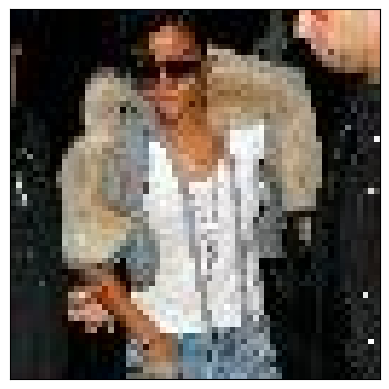

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


9

In [11]:
img = cv2.imread('/content/imagenet/test/images/test_1004.JPEG')
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
resized_image = cv2.resize(img, (64, 64))
plt.xticks([])
plt.yticks([])
plt.imshow(resized_image)
plt.show()

prediction = model.predict(resized_image.reshape(1, 64, 64, 3))
prediction.argmax()